In [34]:
import pandas as pd
import numpy as np
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import re
import spacy
from nltk.corpus import sentiwordnet as swn
from IPython.display import clear_output
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
#from wordcloud import WordCloud
import plotly


In [35]:
data = pd.read_csv(r"C:/Users/Pragya Nainwal/Desktop/drugsComTest_raw.csv")

In [36]:
# data1 = pd.read_csv(r"C:/Users/Pragya Nainwal/Desktop/drugsComTrain_raw.csv")

In [37]:
data.head(5)

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4


In [38]:
data=data[['review']]
data.head(5)

,review
0,"""I&#039;ve tried a few antidepressants over th..."
1,"""My son has Crohn&#039;s disease and has done ..."
2,"""Quick reduction of symptoms"""
3,"""Contrave combines drugs that were used for al..."
4,"""I have been on this birth control for one cyc..."


In [39]:
data=data.iloc[0:10000,:]

In [40]:
# pu=data.iloc[0:3000,:]

In [41]:
# pu.to_csv("C:/Users/Pragya Nainwal/Desktop/pu1.csv")

In [42]:
data.head()

,review
0,"""I&#039;ve tried a few antidepressants over th..."
1,"""My son has Crohn&#039;s disease and has done ..."
2,"""Quick reduction of symptoms"""
3,"""Contrave combines drugs that were used for al..."
4,"""I have been on this birth control for one cyc..."


In [43]:
data.shape

(10000, 1)

In [44]:
#Edits After Removing Stopwords
Edited_Review = data['review'].copy()
data['Review_without_stopwords'] = Edited_Review

In [45]:
data.head(5)

,review,Review_without_stopwords
0,"""I&#039;ve tried a few antidepressants over th...","""I&#039;ve tried a few antidepressants over th..."
1,"""My son has Crohn&#039;s disease and has done ...","""My son has Crohn&#039;s disease and has done ..."
2,"""Quick reduction of symptoms""","""Quick reduction of symptoms"""
3,"""Contrave combines drugs that were used for al...","""Contrave combines drugs that were used for al..."
4,"""I have been on this birth control for one cyc...","""I have been on this birth control for one cyc..."


In [46]:
data.head(5)

,review,Review_without_stopwords
0,"""I&#039;ve tried a few antidepressants over th...","""I&#039;ve tried a few antidepressants over th..."
1,"""My son has Crohn&#039;s disease and has done ...","""My son has Crohn&#039;s disease and has done ..."
2,"""Quick reduction of symptoms""","""Quick reduction of symptoms"""
3,"""Contrave combines drugs that were used for al...","""Contrave combines drugs that were used for al..."
4,"""I have been on this birth control for one cyc...","""I have been on this birth control for one cyc..."


In [47]:
nan_value = float("NaN")
data.replace("", nan_value, inplace=True)

data.dropna(subset = ["Review_without_stopwords"], inplace=True)
data.shape

(10000, 2)

In [48]:
print(nan_value)

nan


In [49]:
data.head()

,review,Review_without_stopwords
0,"""I&#039;ve tried a few antidepressants over th...","""I&#039;ve tried a few antidepressants over th..."
1,"""My son has Crohn&#039;s disease and has done ...","""My son has Crohn&#039;s disease and has done ..."
2,"""Quick reduction of symptoms""","""Quick reduction of symptoms"""
3,"""Contrave combines drugs that were used for al...","""Contrave combines drugs that were used for al..."
4,"""I have been on this birth control for one cyc...","""I have been on this birth control for one cyc..."


In [50]:
# Function to preprocess Reviews data
def preprocess_Reviews_data(data,name):
    # Proprocessing the data
    data[name]=data[name].str.lower()
    # Code to remove the Hashtags from the text
    #data[name]=data[name].apply(lambda x:re.sub(r'\B#\S+','',x))
    # Code to remove the links from the text
    #data[name]=data[name].apply(lambda x:re.sub(r"http\S+", "", x))
    # Code to remove the Special characters from the text 
    data[name]=data[name].apply(lambda x:' '.join(re.findall(r'\w+', x)))
    # Code to substitute the multiple spaces with single spaces
    data[name]=data[name].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))
    # Code to remove all the single characters in the text
    data[name]=data[name].apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))
    # Remove the twitter handlers
#     data[name]=data[name].apply(lambda x:re.sub('@[^\s]+','',x))

# Function to tokenize and remove the stopwords    
def rem_stopwords_tokenize(data,name):
      
    def getting(sen):
        example_sent = sen
        
        filtered_sentence = [] 

        stop_words = set(stopwords.words('english')) 

        word_tokens = word_tokenize(example_sent) 
        
        filtered_sentence = [w for w in word_tokens if not w in stop_words] 
        
        return filtered_sentence
    # Using "getting(sen)" function to append edited sentence to data
    x=[]
    for i in data[name].values:
        x.append(getting(i))
    data[name]=x

In [51]:
lemmatizer = WordNetLemmatizer()
def Lemmatization(data,name):
    def getting2(sen):
        example = sen
        output_sentence =[]
        word_tokens2 = word_tokenize(example)
        lemmatized_output = [lemmatizer.lemmatize(w) for w in word_tokens2]
        
        # Remove characters which have length less than 2  
        without_single_chr = [word for word in lemmatized_output if len(word) > 2]
        # Remove numbers
        cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]
        
        return cleaned_data_title
    # Using "getting2(sen)" function to append edited sentence to data
    x=[]
    for i in data[name].values:
        x.append(getting2(i))
    data[name]=x

In [52]:
def make_sentences(data,name):
    data[name]=data[name].apply(lambda x:' '.join([i+' ' for i in x]))
    # Removing double spaces if created
    data[name]=data[name].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))

In [53]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to C:\Users\Pragya
[nltk_data]     Nainwal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Pragya
[nltk_data]     Nainwal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Pragya
[nltk_data]     Nainwal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Pragya
[nltk_data]     Nainwal\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [54]:
# Using the preprocessing function to preprocess the hotel data
preprocess_Reviews_data(data,'Review_without_stopwords')
# Using tokenizer and removing the stopwords
rem_stopwords_tokenize(data,'Review_without_stopwords')
# Converting all the texts back to sentences
make_sentences(data,'Review_without_stopwords')

#Edits After Lemmatization
final_Edit = data['Review_without_stopwords'].copy()
data["After_lemmatization"] = final_Edit

# Using the Lemmatization function to lemmatize the hotel data
Lemmatization(data,'After_lemmatization')
# Converting all the texts back to sentences
make_sentences(data,'After_lemmatization')

In [55]:
data.head(6)

,review,Review_without_stopwords,After_lemmatization
0,"""I&#039;ve tried a few antidepressants over th...",039 triedfew antidepressants years citalopram ...,triedfew antidepressant year citalopram fluoxe...
1,"""My son has Crohn&#039;s disease and has done ...",son crohn 039disease done well asacol complain...,son crohn 039disease done well asacol complain...
2,"""Quick reduction of symptoms""",quick reduction symptoms,quick reduction symptom
3,"""Contrave combines drugs that were used for al...",contrave combines drugs used alcohol smoking o...,contrave combine drug used alcohol smoking opi...
4,"""I have been on this birth control for one cyc...",birth control one cycle reading reviews type s...,birth control one cycle reading review type si...
5,"""4 days in on first 2 weeks. Using on arms an...",4 days first 2 weeks using arms face put vasel...,day first week using arm face put vaseline lip...


In [56]:
import nltk
import ssl
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [57]:
nltk.download('averaged_perceptron_tagger')
nltk.download('sentiwordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Pragya Nainwal\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package sentiwordnet to C:\Users\Pragya
[nltk_data]     Nainwal\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!


True

In [58]:
pos=neg=obj=count=0

postagging = []

for review in data['After_lemmatization']:
    list = word_tokenize(review)
    postagging.append(nltk.pos_tag(list))

data['pos_tags'] = postagging

def penn_to_wn(tag):
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB
    return None


# Returns list of pos-neg and objective score. But returns empty list if not present in senti wordnet.
def get_sentiment(word,tag):
    wn_tag = penn_to_wn(tag)
    
    if wn_tag not in (wn.NOUN, wn.ADJ, wn.ADV):
        return []

    #Lemmatization
    lemma = lemmatizer.lemmatize(word, pos=wn_tag)
    if not lemma:
        return []

    #Synset is a special kind of a simple interface that is present in NLTK to look up words in WordNet. 
    #Synset instances are the groupings of synonymous words that express the same concept. 
    #Some of the words have only one Synset and some have several.
    synsets = wn.synsets(word, pos=wn_tag)
    if not synsets:
        return []

    # Take the first sense, the most common
    synset = synsets[0]
    swn_synset = swn.senti_synset(synset.name())
#  self.obj_score = 1.0 - (self.pos_score + self.neg_score)

    return [synset.name(), swn_synset.pos_score(),swn_synset.neg_score(),swn_synset.obj_score()]

    pos=neg=obj=count=0
    
    ###################################################################################
senti_score = []

for pos_val in data['pos_tags']:
    senti_val = [get_sentiment(x,y) for (x,y) in pos_val]
    for score in senti_val:
        try:
            pos = pos + score[1]  #positive score is stored at 2nd position
            neg = neg + score[2]  #negative score is stored at 3rd position
        except:
            continue
    senti_score.append(pos - neg)
    pos=neg=0    
    
data['senti_score'] = senti_score
print(data['senti_score'])

print(data.head(5))

0      -0.875
1       1.625
2       0.000
3       0.625
4       1.500
        ...  
9995    4.500
9996    2.125
9997    1.125
9998   -4.000
9999   -1.750
Name: senti_score, Length: 10000, dtype: float64
                                              review  \
0  "I&#039;ve tried a few antidepressants over th...   
1  "My son has Crohn&#039;s disease and has done ...   
2                      "Quick reduction of symptoms"   
3  "Contrave combines drugs that were used for al...   
4  "I have been on this birth control for one cyc...   

                            Review_without_stopwords  \
0  039 triedfew antidepressants years citalopram ...   
1  son crohn 039disease done well asacol complain...   
2                          quick reduction symptoms    
3  contrave combines drugs used alcohol smoking o...   
4  birth control one cycle reading reviews type s...   

                                 After_lemmatization  \
0  triedfew antidepressant year citalopram fluoxe...   
1  son croh

In [59]:
data.head()

,review,Review_without_stopwords,After_lemmatization,pos_tags,senti_score
0,"""I&#039;ve tried a few antidepressants over th...",039 triedfew antidepressants years citalopram ...,triedfew antidepressant year citalopram fluoxe...,"[(triedfew, NN), (antidepressant, JJ), (year, ...",-0.875
1,"""My son has Crohn&#039;s disease and has done ...",son crohn 039disease done well asacol complain...,son crohn 039disease done well asacol complain...,"[(son, NN), (crohn, VBD), (039disease, CD), (d...",1.625
2,"""Quick reduction of symptoms""",quick reduction symptoms,quick reduction symptom,"[(quick, JJ), (reduction, NN), (symptom, NN)]",0.000
3,"""Contrave combines drugs that were used for al...",contrave combines drugs used alcohol smoking o...,contrave combine drug used alcohol smoking opi...,"[(contrave, JJ), (combine, JJ), (drug, NN), (u...",0.625
4,"""I have been on this birth control for one cyc...",birth control one cycle reading reviews type s...,birth control one cycle reading review type si...,"[(birth, NN), (control, NN), (one, CD), (cycle...",1.500


In [60]:
overall=[]
for i in range(len(data)):
    if data['senti_score'][i]> 0.05:
        overall.append('Positive')
    elif data['senti_score'][i]< -0.05:
        overall.append('Negative')
    else:
        overall.append('Neutral')
data['Overall Sentiment']=overall

In [61]:
data.head(10)

,review,Review_without_stopwords,After_lemmatization,pos_tags,senti_score,Overall Sentiment
0,"""I&#039;ve tried a few antidepressants over th...",039 triedfew antidepressants years citalopram ...,triedfew antidepressant year citalopram fluoxe...,"[(triedfew, NN), (antidepressant, JJ), (year, ...",-0.875,Negative
1,"""My son has Crohn&#039;s disease and has done ...",son crohn 039disease done well asacol complain...,son crohn 039disease done well asacol complain...,"[(son, NN), (crohn, VBD), (039disease, CD), (d...",1.625,Positive
2,"""Quick reduction of symptoms""",quick reduction symptoms,quick reduction symptom,"[(quick, JJ), (reduction, NN), (symptom, NN)]",0.000,Neutral
3,"""Contrave combines drugs that were used for al...",contrave combines drugs used alcohol smoking o...,contrave combine drug used alcohol smoking opi...,"[(contrave, JJ), (combine, JJ), (drug, NN), (u...",0.625,Positive
4,"""I have been on this birth control for one cyc...",birth control one cycle reading reviews type s...,birth control one cycle reading review type si...,"[(birth, NN), (control, NN), (one, CD), (cycle...",1.500,Positive
5,"""4 days in on first 2 weeks. Using on arms an...",4 days first 2 weeks using arms face put vasel...,day first week using arm face put vaseline lip...,"[(day, NN), (first, RB), (week, NN), (using, V...",0.875,Positive
6,"""I&#039;ve had the copper coil for about 3 mon...",039 copper coil 3 months nowwas really excited...,copper coil month nowwas really excited though...,"[(copper, NN), (coil, NN), (month, NN), (nowwa...",-2.875,Negative
7,"""This has been great for me. I&#039;ve been on...",great me039 2 weeks last weekonly 3 headaches ...,great me039 week last weekonly headache went a...,"[(great, JJ), (me039, NN), (week, NN), (last, ...",-0.375,Negative
8,"""Ive been on Methadone for over ten years and ...",ive methadone ten years currentlyam trying get...,ive methadone ten year currentlyam trying get ...,"[(ive, JJ), (methadone, NN), (ten, CD), (year,...",0.375,Positive
9,"""I was on this pill for almost two years. It d...",pill almost two years work far getting pregnan...,pill almost two year work far getting pregnant...,"[(pill, NN), (almost, RB), (two, CD), (year, N...",-1.875,Negative


In [62]:
data.drop(['review'],axis=1,inplace=True)
data.drop(['Review_without_stopwords'],axis=1,inplace=True)
data.drop(['pos_tags'],axis=1,inplace=True)
data.drop(['senti_score'],axis=1,inplace=True)

In [63]:
data.head(5)

,After_lemmatization,Overall Sentiment
0,triedfew antidepressant year citalopram fluoxe...,Negative
1,son crohn 039disease done well asacol complain...,Positive
2,quick reduction symptom,Neutral
3,contrave combine drug used alcohol smoking opi...,Positive
4,birth control one cycle reading review type si...,Positive


C:\ANACONDADS\envs\tf\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Overall Sentiment', ylabel='count'>

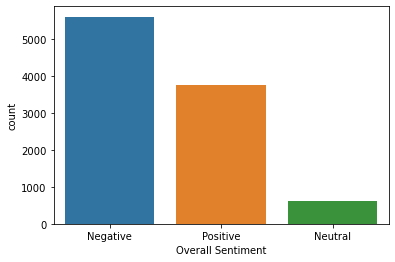

In [64]:
import seaborn as sns
sns.countplot(data['Overall Sentiment'])

In [65]:
data['reviews_text_new'] = data['After_lemmatization'].copy()

In [66]:
# The following code creates a word-document matrix.
# from sklearn.feature_extraction.text import CountVectorizer

# vec = CountVectorizer()
# X = vec.fit_transform(data['reviews_text_new'])
# df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
# df.head(3)

C:\ANACONDADS\envs\tf\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,000engaged,000lbsam,000mgday,000month,000s,0039using,00am,00clock,00continue,00have,...,zypreza,zyrtec,zyrtecday,zyrtecdidn,zyrtecforfew,zyrtechave,zyrteci,zytiga,zyvox,zzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
vect = CountVectorizer()
vect.fit(data['reviews_text_new'])
vect.get_feature_names()
# transform training data into a 'document-term matrix'
simple_train_dtm = vect.transform(data['reviews_text_new'])
df = pd.DataFrame(simple_train_dtm.toarray(), columns = vec.get_feature_names())
print(df.head(3))

C:\ANACONDADS\envs\tf\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


   000engaged  000lbsam  000mgday  000month  000s  0039using  00am  00clock  \
0           0         0         0         0     0          0     0        0   
1           0         0         0         0     0          0     0        0   
2           0         0         0         0     0          0     0        0   

   00continue  00have  ...  zypreza  zyrtec  zyrtecday  zyrtecdidn  \
0           0       0  ...        0       0          0           0   
1           0       0  ...        0       0          0           0   
2           0       0  ...        0       0          0           0   

   zyrtecforfew  zyrtechave  zyrteci  zytiga  zyvox  zzz  
0             0           0        0       0      0    0  
1             0           0        0       0      0    0  
2             0           0        0       0      0    0  

[3 rows x 47201 columns]


In [80]:
### Creating a python object of the class CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
bow_counts = CountVectorizer(tokenizer= word_tokenize, # type of tokenization
                             ngram_range=(1,3)) # number of n-grams

bow_data = bow_counts.fit_transform(data['reviews_text_new'])

In [81]:
from sklearn.model_selection import train_test_split
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(bow_data, # Features
                                                                    data['Overall Sentiment'], # Target variable
                                                                    test_size = 0.2, # 20% test size
                                                                    random_state = 0) # random

In [82]:
import sklearn.metrics as metrics
# import sklearn.metrics import accuracy_score 

In [83]:
from sklearn.linear_model import LogisticRegression
### Training the model 
lr_model_all = LogisticRegression() # Logistic regression
lr_model_all.fit(X_train_bow, y_train_bow) # Fitting a logistic regression model

## Predicting the output
test_pred_lr_all = lr_model_all.predict(X_test_bow) # Class prediction


## Calculate key performance metrics
accuracy = metrics.accuracy_score(y_test_bow, test_pred_lr_all)
accuracy 
# from sklearn.metrics import classification_report
# # Print a classification report
# print(classification_report(y_test_bow,test_pred_lr_all))

0.8085

In [86]:
test_pred_lr_all

array(['Negative', 'Negative', 'Negative', ..., 'Negative', 'Positive',
       'Positive'], dtype=object)

In [72]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# noise_words = []
# ### Creating a python object of the class CountVectorizer
# tfidf_counts = TfidfVectorizer(tokenizer= word_tokenize, # type of tokenization
#                                stop_words=noise_words, # List of stopwords
#                                ngram_range=(1,1)) # number of n-grams

# tfidf_data = tfidf_counts.fit_transform(data['reviews_text_new'])

In [73]:
# X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(tfidf_data,
#                                                                             data['Overall Sentiment'],
#                                                                             test_size = 0.2,
#                                                                             random_state = 0)

In [74]:
### Setting up the model class
# lr_model_tf_idf = LogisticRegression()

# ## Training the model 
# lr_model_tf_idf.fit(X_train_tfidf,y_train_tfidf)

# ## Prediciting the results
# test_pred_lr_all = lr_model_tf_idf.predict(X_test_tfidf)

# ## Calculate key performance metrics

# accuracy = metrics.accuracy_score(y_test_tfidf, test_pred_lr_all)
# accuracy 
# # Print a classification report
# # print(classification_report(y_test_tfidf,test_pred_lr_all))

C:\ANACONDADS\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8075

In [75]:
# test_pred_lr_all

array(['Negative', 'Negative', 'Negative', ..., 'Negative', 'Positive',
       'Positive'], dtype=object)